## Веншенесс Жозеф 23.М08-мм

- Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блокнот с анализом этих данных можно найти тут.
- Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
- Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
- Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
- Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- *(+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.
- *(+3 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


**Описание датасета:**

- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации и научиться предсказывать целовой признак target имеет ли пациент заболевание сердца.

In [3]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

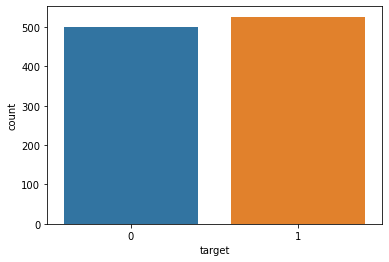

In [4]:
sns.countplot('target', data=df)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


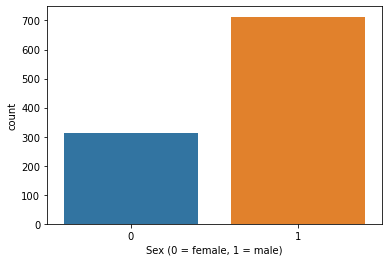

In [6]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [7]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


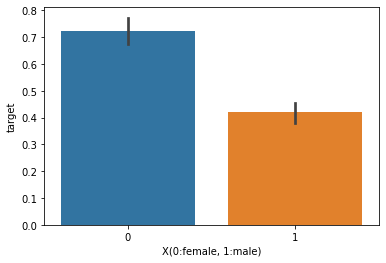

In [8]:
sns.barplot(data=df, x="sex", y="target")
plt.xlabel('X(0:female, 1:male)')
plt.show()

#commentaire

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Нет пропусков

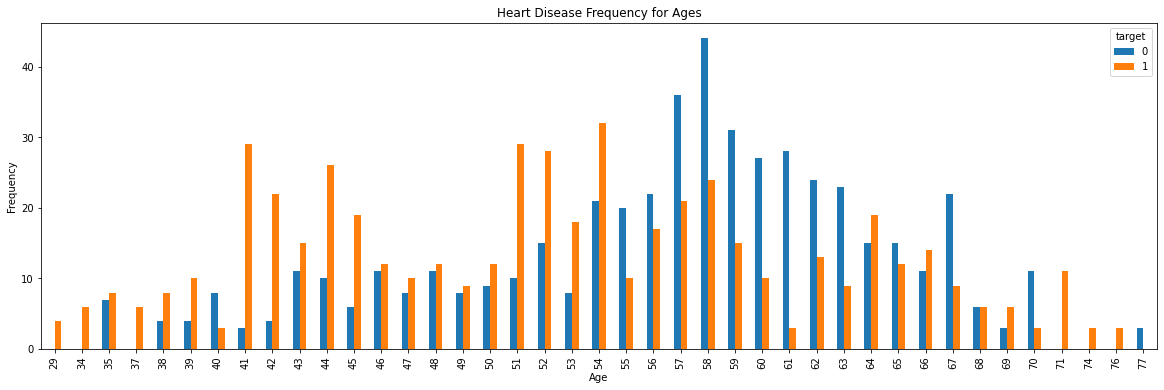

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

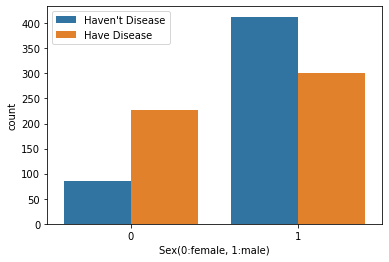

In [11]:
sns.countplot(data=df, x="sex", hue="target")
plt.xlabel("Sex(0:female, 1:male)")
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

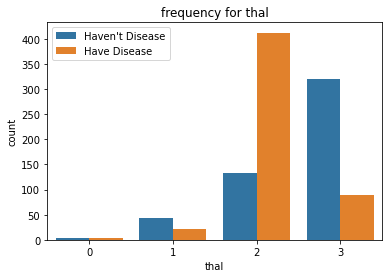

In [12]:
sns.countplot(data=df, x="thal", hue="target")
plt.title('frequency for thal')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

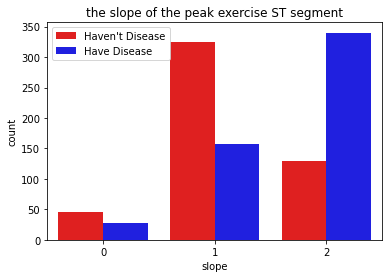

In [13]:
sns.countplot(data=df, x="slope", hue="target", palette= ('red', 'blue'))
plt.title('the slope of the peak exercise ST segment')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

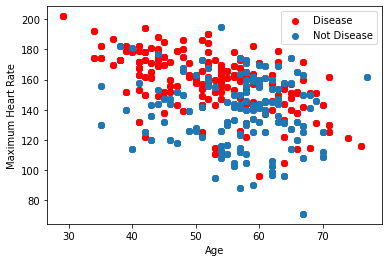

In [14]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

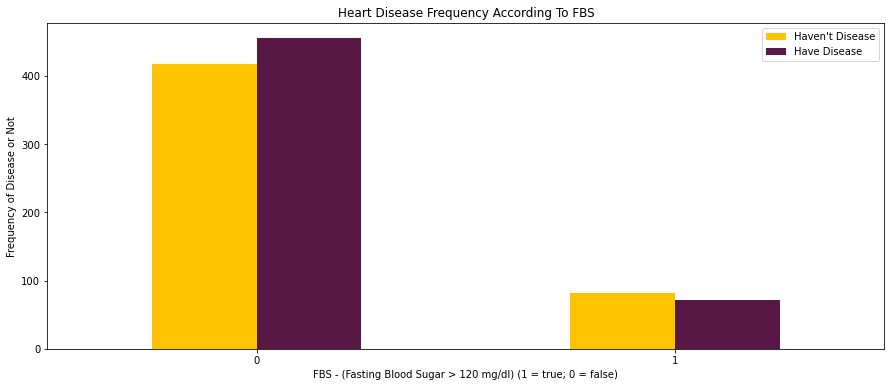

In [15]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

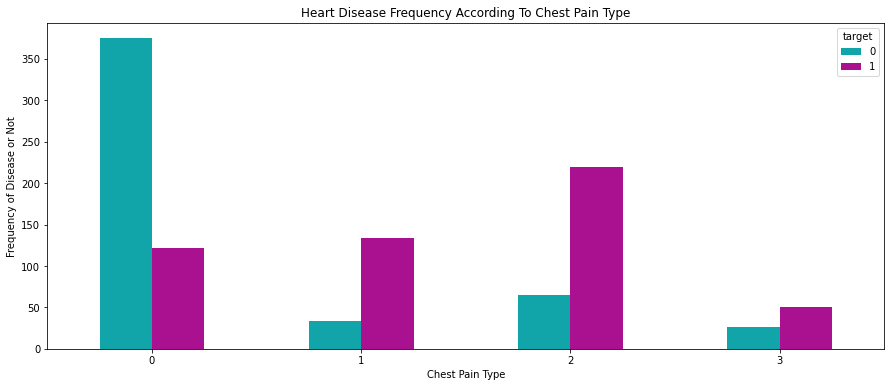

In [16]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [17]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Построим матрицу корреляции

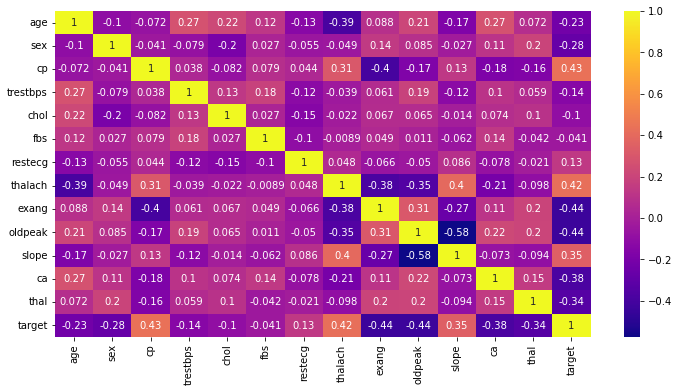

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='plasma')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

In [20]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Categorical data are: sex, cp, fbs, restecg, exang, slope, ca, thal

let's transform the categorical features to quantitative

In [21]:
sex_dum = pd.get_dummies(df['sex'], prefix = "sex")
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
fbs_dum = pd.get_dummies(df['fbs'], prefix = "fbs")
restecg_dum = pd.get_dummies(df['restecg'], prefix = "restecg")
exang_dum = pd.get_dummies(df['exang'], prefix = "exang")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")
ca_dum = pd.get_dummies(df['ca'], prefix = "ca")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")

frames = [df, sex_dum, cp_dum, fbs_dum, restecg_dum, exang_dum, slope_dum, ca_dum, thal_dum]

df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,1,0,125,212,0,1,168,0,1.0,...,1,0,0,1,0,0,0,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,1,0,0,0,0,0,0,0,1
2,70,1,0,145,174,0,1,125,1,2.6,...,0,1,0,0,0,0,0,0,0,1
3,61,1,0,148,203,0,1,161,0,0.0,...,1,0,1,0,0,0,0,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,1,0,0,0,1,0


In [22]:
df.drop(columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
1021,60,125,258,141,2.8,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1022,47,110,275,118,1.0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1023,50,110,254,159,0.0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


реализуем два из методов классификации, с возможностью настройки гиперпараметров.

Logistic regression

In [23]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from collections import Counter
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticReg():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred
    def get_params(self, deep=True):
        return {'lr': self.lr, 'n_iters':self.n_iters}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

Naives bayes classifier

In [25]:
class NaiveBayesGaussian(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Laplace smoothing parameter

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_probs = {}
        self.mean = {}
        self.variance = {}
        
        for cls in self.classes:
            X_cls = X[y == cls]
            self.class_probs[cls] = (len(X_cls) + self.alpha) / (len(X) + self.alpha * len(self.classes))
            self.mean[cls] = np.mean(X_cls, axis=0)
            self.variance[cls] = np.var(X_cls, axis=0)

    def _gaussian_probability(self, x, mean, variance):
        return (1.0 / (np.sqrt(2 * np.pi * variance))) * np.exp(-(x - mean)**2 / (2 * variance))

    def _predict_single(self, x):
        posteriors = {}
        for cls in self.classes:
            class_prob = self.class_probs[cls]
            likelihood = np.prod(self._gaussian_probability(x, self.mean[cls], self.variance[cls]))
            posteriors[cls] = class_prob * likelihood
        return max(posteriors, key=posteriors.get)

    def predict(self, X):
        return [self._predict_single(x) for x in X]

    def get_params(self, deep=True):
        return {'alpha': self.alpha}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self


Разбиение данных и масшатабирование данных

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)



Используем gridSsearchCV для нашей реализации и для билблиотечной реализации naive bayes gaussian classifier

Best score for myNB: 0.5788073038073038
Best parameter for myNB: {'var_smoothing': 1e-09}
accuracy for myNB: 0.525974025974026
              precision    recall  f1-score   support

           0       0.78      0.11      0.20       159
           1       0.51      0.97      0.66       149

    accuracy                           0.53       308
   macro avg       0.64      0.54      0.43       308
weighted avg       0.65      0.53      0.42       308



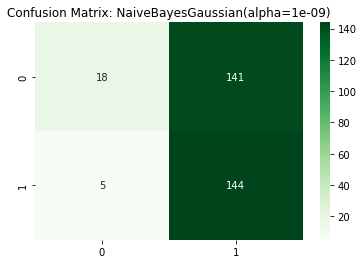

Best score for nb_library: 0.8018550893550895
Best parameter for nb_library: {'var_smoothing': 1e-09}
accuracy for nb_library: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.92      0.63      0.75       159
           1       0.70      0.94      0.80       149

    accuracy                           0.78       308
   macro avg       0.81      0.78      0.78       308
weighted avg       0.81      0.78      0.77       308



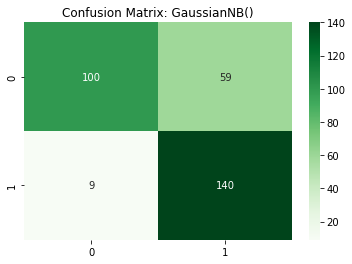

In [27]:
from sklearn.metrics import classification_report

modelGrid ={'myNB':NaiveBayesGaussian(alpha=1e-09), 'nb_library': GaussianNB()}

param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07]
}
for key, model in modelGrid.items():
    nb_best = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=5)
    nb_best.fit(X_train_scaled, y_train)
    best_est = nb_best.best_estimator_
    y_pred = best_est.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    best_param = nb_best.best_params_
    var_smoothing = best_param['var_smoothing']
    print(f"Best score for {key}: {nb_best.best_score_}")
    print(f"Best parameter for {key}: {nb_best.best_params_}")
    #print(f"accuracy for {key}: {nb_best.score(X_test_scaled, y_test)}")
    print(f"accuracy for {key}: {accuracy}")
    print(classification_report(y_test,y_pred))
    conf = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix: {model}')
    plt.show()

Используем gridSsearchCV для нашей реализации и для билблиотечной реализации logistic regression

Best score: 0.881400543900544
Best parameter: {'lr': 1, 'num_iter': 100}
accuracy : 0.7987012987012987
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       159
           1       0.77      0.83      0.80       149

    accuracy                           0.80       308
   macro avg       0.80      0.80      0.80       308
weighted avg       0.80      0.80      0.80       308



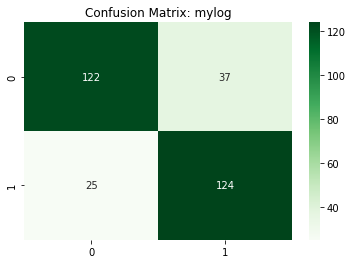

In [28]:

log = LogisticReg()
params = {
            'lr': [0.001, 0.01, 0.1, 1],
            'num_iter': [100, 500, 1000]
        }
log_best = GridSearchCV(estimator=log, param_grid=params, scoring="accuracy", cv=5)
log_best.fit(X_train_scaled, y_train)
best_est = log_best.best_estimator_
y_pred = best_est.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
best_param = log_best.best_params_
print(f"Best score: {log_best.best_score_}")
print(f"Best parameter: {log_best.best_params_}")
#print(f"accuracy for {key}: {nb_best.score(X_test_scaled, y_test)}")
print(f"accuracy : {accuracy}")
print(classification_report(y_test,y_pred))
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Greens')
plt.title(f'Confusion Matrix: mylog')
plt.show()

Optimal number of features for logreg: 9
Selected features: for logreg: ['cp', 'chol', 'oldpeak', 'sex_0', 'sex_1', 'slope_1', 'ca_0', 'ca_4', 'thal_3']


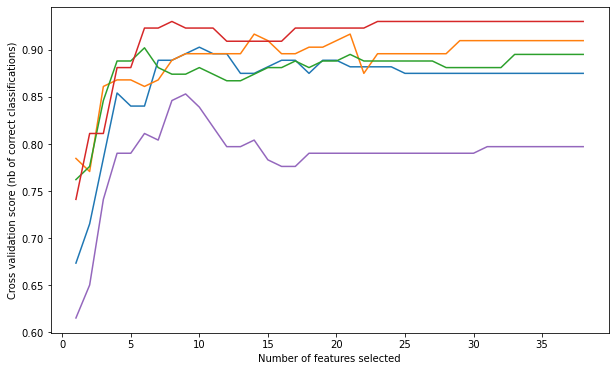

Optimal number of features for DTC: 9
Selected features: for DTC: ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'ca_0', 'thal_2']


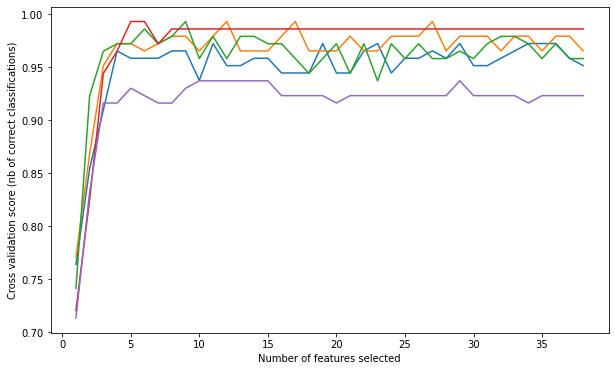

In [29]:
from sklearn.feature_selection import RFECV
selected_features = {}
i = 0
modelList = {'logreg':LogisticRegression(),  
             'DTC':DecisionTreeClassifier(),
             }
for key, model in modelList.items():
    rfecv = RFECV(estimator = model , step=1, cv=5, scoring='accuracy')
    rfecv.fit(X_train_scaled, y_train)

    selected_features[key] = list(X_train.columns[rfecv.support_])

    print(f"Optimal number of features for {key}: {rfecv.n_features_}")
    print(f'Selected features: for {key}: {selected_features[key]}')

    plt.figure(figsize=(10,6))
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

Best parameters for the Logistic Regression from the library, Decision Tree, k-nearest neighbor, SVM

Best score for logisticRegression: 0.8842171717171716
Best parameter for logisticRegression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy for logisticRegression: 0.7987012987012987
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       159
           1       0.77      0.83      0.80       149

    accuracy                           0.80       308
   macro avg       0.80      0.80      0.80       308
weighted avg       0.80      0.80      0.80       308



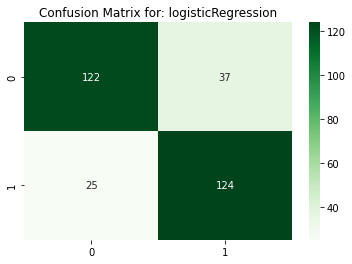

Best score for DecisionTree: 0.9637140637140638
Best parameter for DecisionTree: {'max_depth': 9, 'min_samples_split': 2}
accuracy for DecisionTree: 0.961038961038961
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       159
           1       0.99      0.93      0.96       149

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



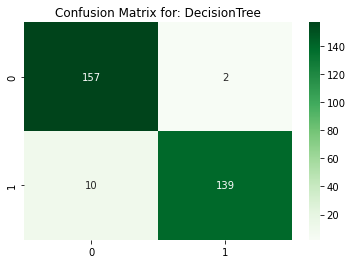

Best score for K-nearest neighbor: 0.9706973581973581
Best parameter for K-nearest neighbor: {'n_neighbors': 7, 'weights': 'distance'}
accuracy for K-nearest neighbor: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       149

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



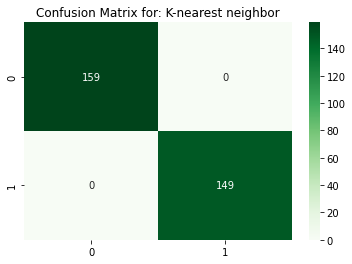

Best score for SVM: 0.9651126651126652
Best parameter for SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy for SVM: 0.9707792207792207
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



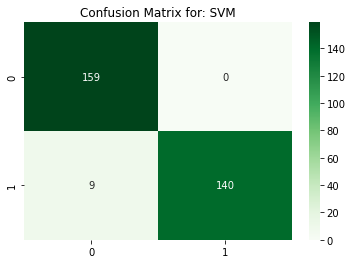

In [31]:
modelGrid1 ={'logisticRegression':{
    'model': LogisticRegression(),
    'param_grid': {
        'C': [0.1, 1, 10, 100],
        'penalty':['l1','l2'],
        'solver': ['liblinear', 'lbfgs']
        }
    },
    'DecisionTree':{
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [3, 5, 7, 9],
            'min_samples_split': [2, 4, 6]
        }
    },
    'K-nearest neighbor':{
        'model': KNeighborsClassifier(),
        'param_grid': {
            "n_neighbors": range(1, 11, 1), 
            "weights": ['uniform', 'distance']
        }
    },
    'SVM':{
        'model': SVC(),
        'param_grid':{
            'C': [0.1, 1, 10, 100, 1000],  
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
            'kernel': ['rbf'] 
        }
    }
}


for key, model in modelGrid1.items():
    nb_best = GridSearchCV(estimator=model['model'], param_grid=model['param_grid'], scoring="accuracy", cv=5)
    nb_best.fit(X_train_scaled, y_train)
    best_est = nb_best.best_estimator_
    y_pred = best_est.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    best_param = nb_best.best_params_
    print(f"Best score for {key}: {nb_best.best_score_}")
    print(f"Best parameter for {key}: {nb_best.best_params_}")
    #print(f"accuracy for {key}: {nb_best.score(X_test_scaled, y_test)}")
    print(f"accuracy for {key}: {accuracy}")
    print(classification_report(y_test,y_pred))
    conf = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix for: {key}')
    plt.show()

The k-nearest neighbors algorithm is the best one but the accuracy is 1 that mean model overlifting can occur in case of new data. The SVM model can be a better choice 

## задача классификация 2

Let's use the dataset about the prediction about breast cancer

In [32]:
data = pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The target feature is **Diagnosis**

In [34]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [35]:
data.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [36]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In this dataset there is no missing value

In [37]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Let's represent the target value in plot

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

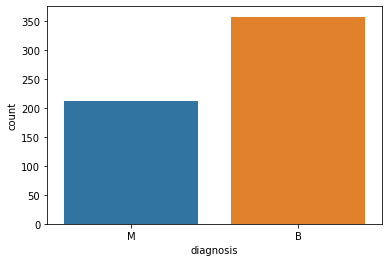

In [38]:
sns.countplot('diagnosis', data=data)

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>],
       [<AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:>]], dtype=object)

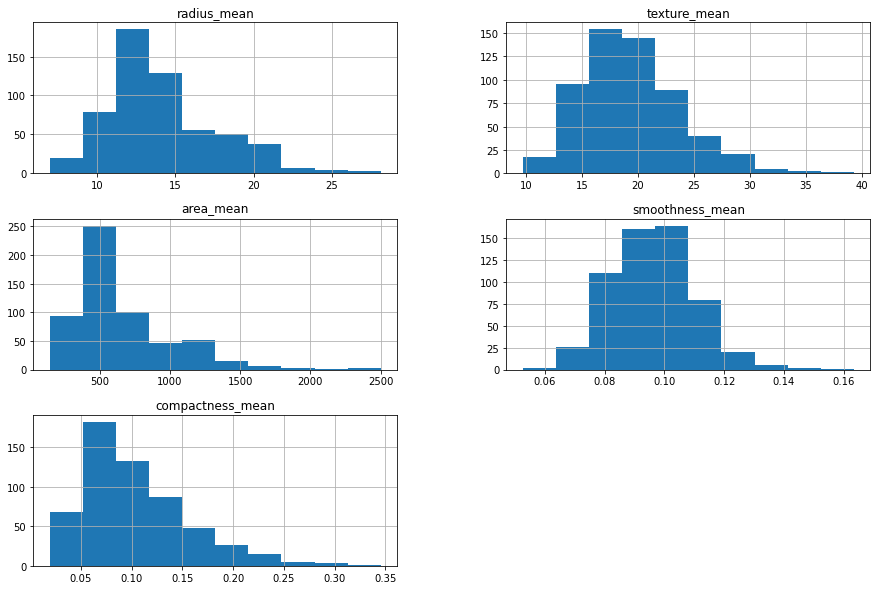

In [39]:
data.hist(column=['radius_mean','texture_mean','area_mean','smoothness_mean','compactness_mean'], figsize=(15, 10)) 


array([[<AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>],
       [<AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>]],
      dtype=object)

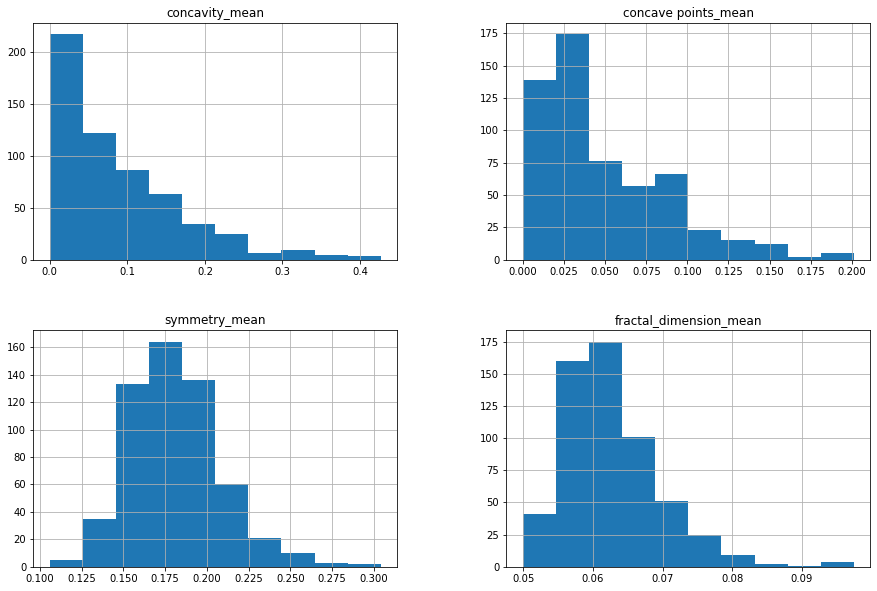

In [40]:
data.hist(column=['concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'], figsize=(15, 10)) 

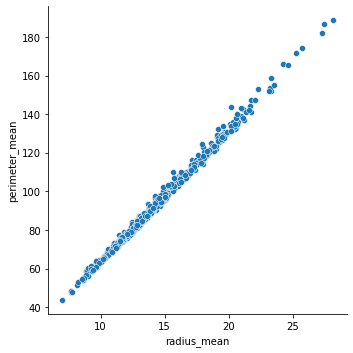

In [41]:
sns.relplot(data=data, x="radius_mean", y="perimeter_mean")

<AxesSubplot:xlabel='diagnosis', ylabel='concavity_mean'>

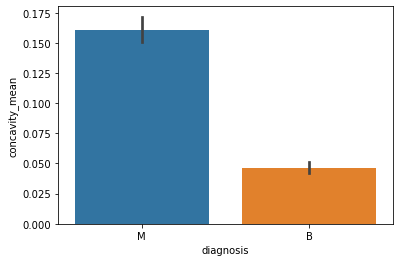

In [42]:
sns.barplot(data=data, x="diagnosis", y="concavity_mean")

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

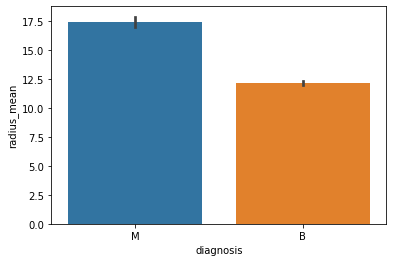

In [43]:
sns.barplot(data=data, x="diagnosis", y="radius_mean")

In [44]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
data['diagnosis']= label_encoder.fit_transform(data['diagnosis'])
data.diagnosis.unique()

array([1, 0])

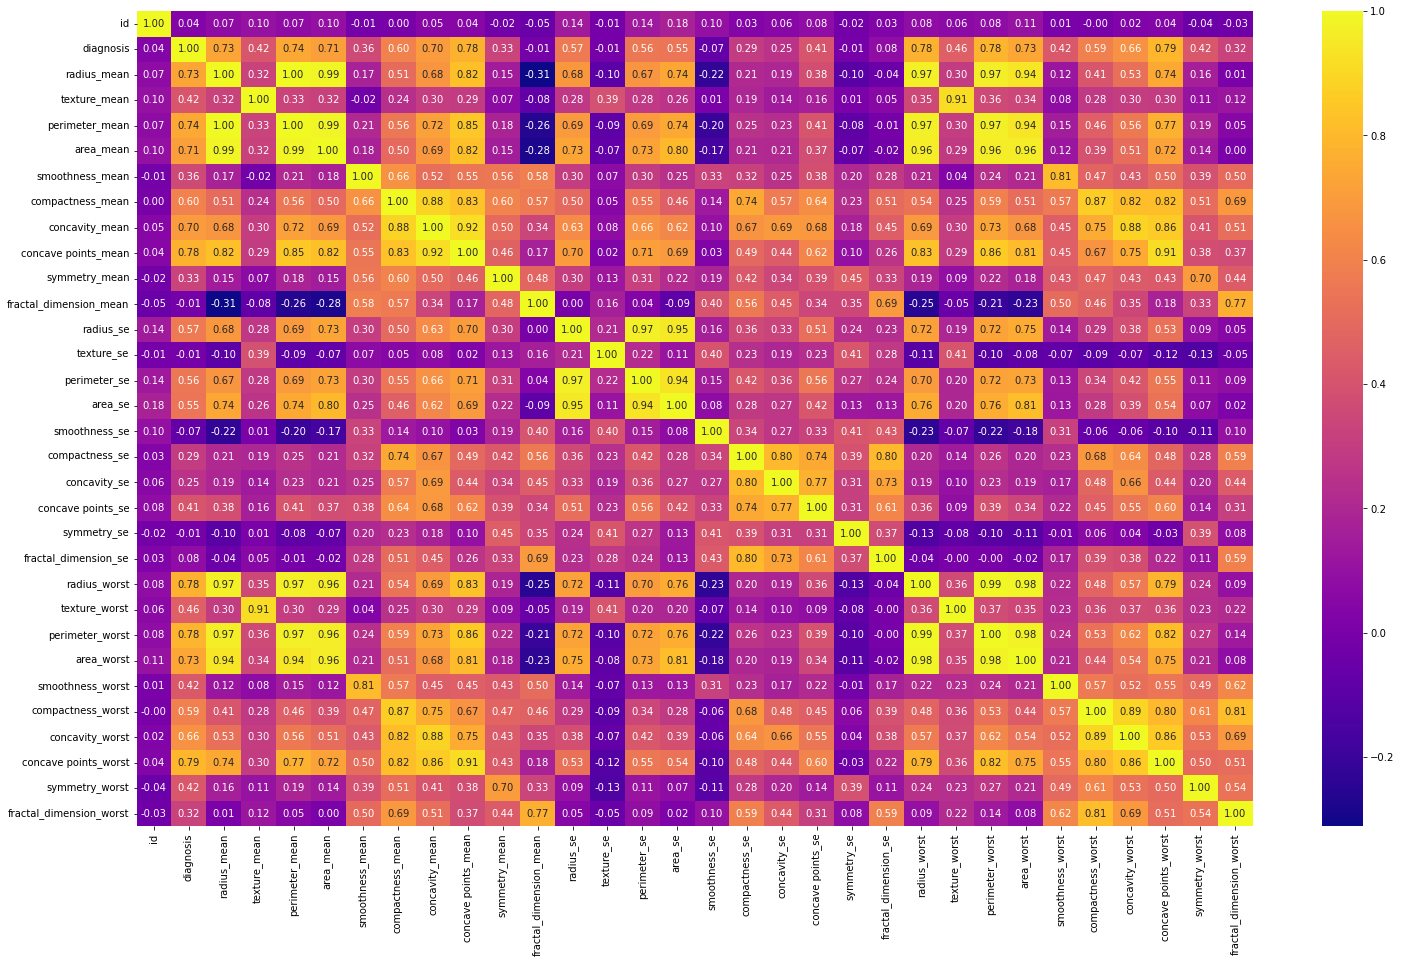

In [45]:
sns.heatmap(data.corr(), annot=True,xticklabels=True, yticklabels=True, cmap='plasma', fmt='.2f')
fig = plt.gcf()
fig.set_size_inches(25, 15)
plt.show()


In [46]:
data=data.drop(columns=["id","perimeter_mean","perimeter_se","perimeter_worst","area_mean",
                        "radius_worst","area_worst","concavity_worst","compactness_worst", 
                        "texture_worst","concave points_worst"])

In [47]:
data=data.drop(columns=["concavity_mean","area_se", "compactness_se", "smoothness_worst","concave points_mean",
                       "fractal_dimension_worst","concavity_se", "symmetry_worst","radius_mean"])

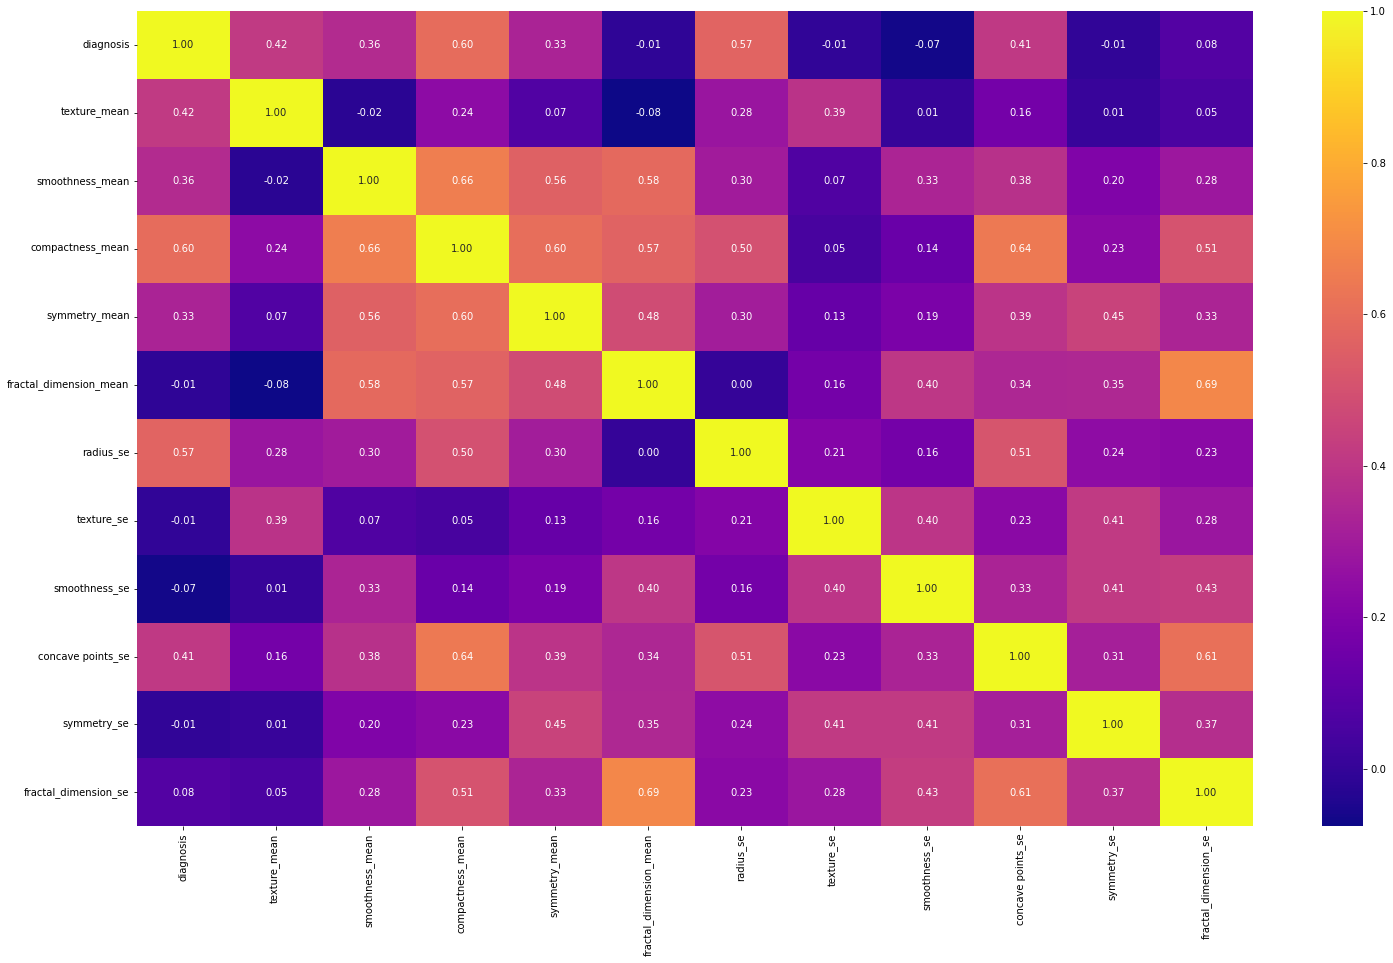

In [48]:
sns.heatmap(data.corr(), annot=True, xticklabels=True, yticklabels=True, cmap='plasma', fmt='.2f')
fig = plt.gcf()
fig.set_size_inches(25, 15)
plt.show()

In [50]:
y = data['diagnosis']
X = data.drop(columns=['diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)


Best score for myNB: 0.8592405063291139
Best parameter for myNB: {'var_smoothing': 1e-09}
accuracy for myNB: 0.8771929824561403
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       108
           1       0.86      0.79      0.83        63

    accuracy                           0.88       171
   macro avg       0.87      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171



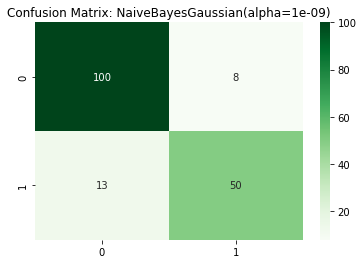

Best score for nb_library: 0.8592405063291139
Best parameter for nb_library: {'var_smoothing': 1e-09}
accuracy for nb_library: 0.8771929824561403
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       108
           1       0.86      0.79      0.83        63

    accuracy                           0.88       171
   macro avg       0.87      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171



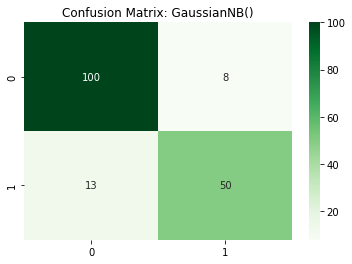

In [51]:
for key, model in modelGrid.items():
    nb_best = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=5)
    nb_best.fit(X_train_scaled, y_train)
    best_est = nb_best.best_estimator_
    y_pred = best_est.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    best_param = nb_best.best_params_
    var_smoothing = best_param['var_smoothing']
    print(f"Best score for {key}: {nb_best.best_score_}")
    print(f"Best parameter for {key}: {nb_best.best_params_}")
    #print(f"accuracy for {key}: {nb_best.score(X_test_scaled, y_test)}")
    print(f"accuracy for {key}: {accuracy}")
    print(classification_report(y_test,y_pred))
    conf = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix: {model}')
    plt.show()

Best score: 0.9068354430379746
Best parameter: {'lr': 0.01, 'num_iter': 100}
accuracy : 0.9532163742690059
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.98      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



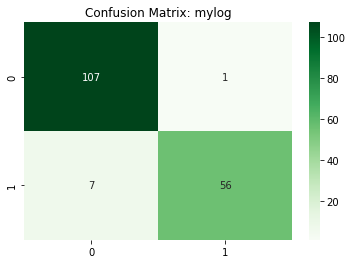

In [52]:
log_best = GridSearchCV(estimator=log, param_grid=params, scoring="accuracy", cv=5)
log_best.fit(X_train_scaled, y_train)
best_est = log_best.best_estimator_
y_pred = best_est.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
best_param = log_best.best_params_
print(f"Best score: {log_best.best_score_}")
print(f"Best parameter: {log_best.best_params_}")
#print(f"accuracy for {key}: {nb_best.score(X_test_scaled, y_test)}")
print(f"accuracy : {accuracy}")
print(classification_report(y_test,y_pred))
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Greens')
plt.title(f'Confusion Matrix: mylog')
plt.show()

Optimal number of features for logreg: 10
Selected features: for logreg: ['texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']


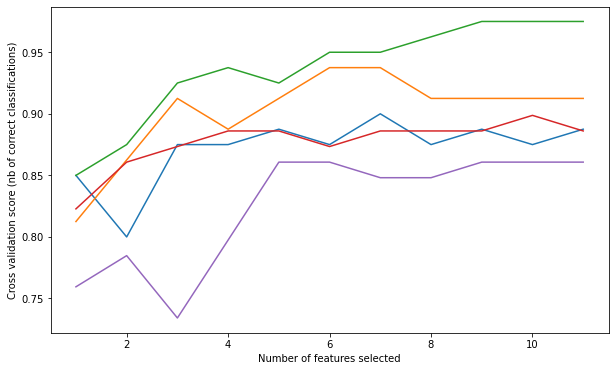

Optimal number of features for DTC: 10
Selected features: for DTC: ['texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']


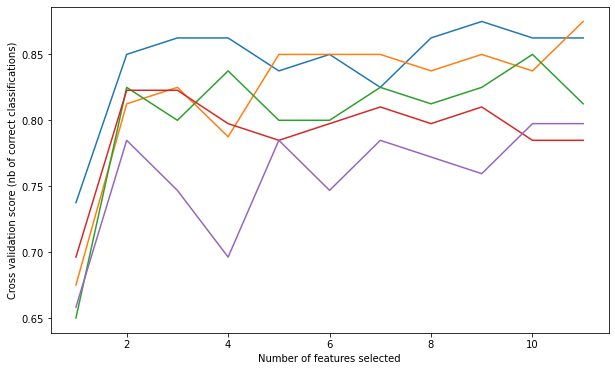

In [53]:
for key, model in modelList.items():
    rfecv = RFECV(estimator = model , step=1, cv=5, scoring='accuracy')
    rfecv.fit(X_train_scaled, y_train)

    selected_features[key] = list(X_train.columns[rfecv.support_])

    print(f"Optimal number of features for {key}: {rfecv.n_features_}")
    print(f'Selected features: for {key}: {selected_features[key]}')

    plt.figure(figsize=(10,6))
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

Best score for logisticRegression: 0.9093670886075949
Best parameter for logisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy for logisticRegression: 0.9590643274853801
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



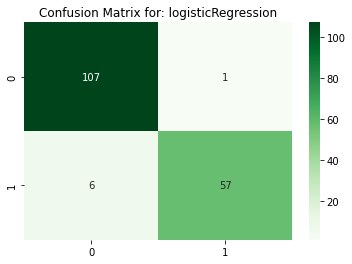

Best score for DecisionTree: 0.8340506329113924
Best parameter for DecisionTree: {'max_depth': 3, 'min_samples_split': 4}
accuracy for DecisionTree: 0.8538011695906432
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       108
           1       0.83      0.76      0.79        63

    accuracy                           0.85       171
   macro avg       0.85      0.83      0.84       171
weighted avg       0.85      0.85      0.85       171



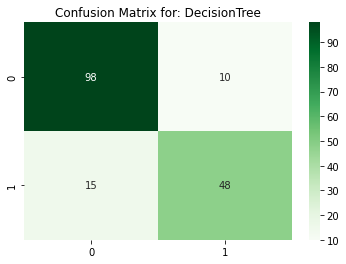

Best score for K-nearest neighbor: 0.9194936708860759
Best parameter for K-nearest neighbor: {'n_neighbors': 10, 'weights': 'distance'}
accuracy for K-nearest neighbor: 0.9181286549707602
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.89      0.89      0.89        63

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



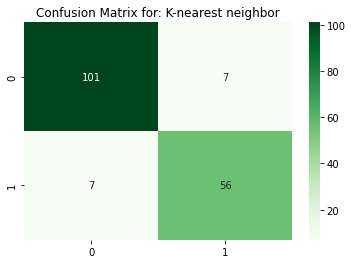

Best score for SVM: 0.9168354430379747
Best parameter for SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy for SVM: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



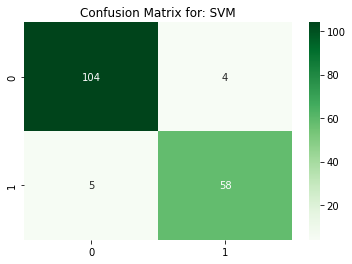

In [54]:
for key, model in modelGrid1.items():
    nb_best = GridSearchCV(estimator=model['model'], param_grid=model['param_grid'], scoring="accuracy", cv=5)
    nb_best.fit(X_train_scaled, y_train)
    best_est = nb_best.best_estimator_
    y_pred = best_est.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    best_param = nb_best.best_params_
    print(f"Best score for {key}: {nb_best.best_score_}")
    print(f"Best parameter for {key}: {nb_best.best_params_}")
    #print(f"accuracy for {key}: {nb_best.score(X_test_scaled, y_test)}")
    print(f"accuracy for {key}: {accuracy}")
    print(classification_report(y_test,y_pred))
    conf = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix for: {key}')
    plt.show()

The best model is the one with Logistic Regression from the scikit-learn library